In [91]:
print(repr(long_df['place_cleaned'].unique()))

array(['Unknown', 'Hyoja 3-dong', 'Hupyeong 1-dong', 'Hupyeong 2-dong',
       'Seoksa-dong', 'Soyang-dong', 'Toegye-dong', 'Dong-myeon',
       'Hupyeong 3-dong', 'Sinsa-u-dong', 'Gangnam-dong', 'Hyoja 1-dong',
       'Joun-dong', 'Gyo-dong', 'Hyoja 2-dong', 'Yaksamyeong-dong',
       'Geunhwa-dong', 'Dongnae-myeon', '교동 ', 'Sindong-myeon'],
      dtype=object)



Grouped revenue output:
place_cleaned
Sindong-myeon        22600.00
Yaksamyeong-dong    256700.00
Geunhwa-dong        343600.00
Dongnae-myeon       346900.00
Joun-dong           464600.00
Hyoja 1-dong        469400.00
Gangnam-dong        576200.00
Hyoja 3-dong        652400.00
Gyo-dong            661800.00
Sinsa-u-dong        812100.00
Soyang-dong        1127700.00
Hyoja 2-dong       1373400.00
Toegye-dong        1591800.00
Seoksa-dong        1654700.00
Hupyeong 1-dong    1792100.00
Hupyeong 2-dong    1961100.00
Hupyeong 3-dong    2022300.00
Unknown            2739400.00
Dong-myeon         3669900.00
Name: total_revenue, dtype: float64
Is Empty: False


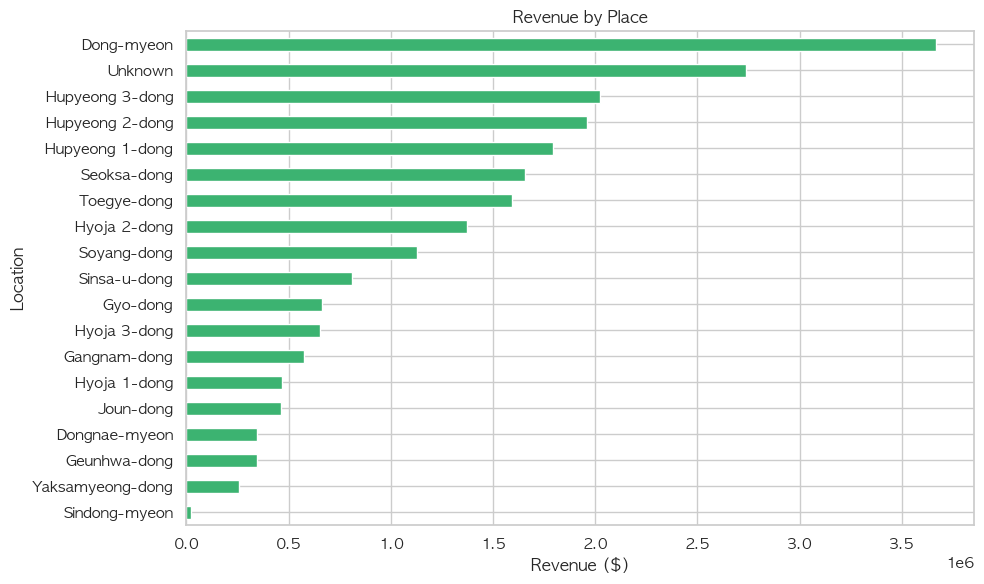

In [92]:
import matplotlib.pyplot as plt

# Clean column names just in case
long_df.columns = long_df.columns.str.strip()

# Define translation map
place_translation = {
    '효자 3동': 'Hyoja 3-dong',
    '후평 1동': 'Hupyeong 1-dong',
    '후평 2동': 'Hupyeong 2-dong',
    '식사동': 'Siksa-dong',
    '소양동': 'Soyang-dong',
    '퇴계동': 'Toegye-dong',
    '동면': 'Dong-myeon',
    '후평 3동': 'Hupyeong 3-dong',
    '신사우동': 'Sinsa-u-dong',
    '강남동': 'Gangnam-dong',
    '효자 1동': 'Hyoja 1-dong',
    '조운동': 'Joun-dong',
    '교동': 'Gyo-dong',
    '효자 2동': 'Hyoja 2-dong',
    '약사명동': 'Yaksamyeong-dong',
    '근화동': 'Geunhwa-dong',
    '신동면': 'Sindong-myeon',
    '석사동': 'Seoksa-dong',
    '동내면': 'Dongnae-myeon'
}

# Clean column names just in case
long_df.columns = long_df.columns.str.strip()

# Fill missing place names
long_df['place_cleaned'] = long_df['place'].fillna("Unknown")

long_df['place_cleaned'] = long_df['place_cleaned'].str.strip()

# Translate Korean place names to English
long_df['place_cleaned'] = long_df['place_cleaned'].replace(place_translation)


# Group revenue by cleaned place
place_revenue = (
    long_df.groupby('place_cleaned')['total_revenue']
    .sum()
    .sort_values()
)

# Debug print
print("\nGrouped revenue output:")
print(place_revenue)
print("Is Empty:", place_revenue.empty)

# Plot if not empty
if not place_revenue.empty:
    plt.figure(figsize=(10, 6))
    place_revenue.plot(kind='barh', color='mediumseagreen')
    plt.title("Revenue by Place")
    plt.xlabel("Revenue ($)")
    plt.ylabel("Location")
    plt.tight_layout()
    plt.savefig("place_based_revenue_cleaned_final.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("❌ place_revenue is empty — nothing to plot.")


In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Fix column names
long_df.columns = long_df.columns.str.strip()

print("HEAD of long_df:")
print(long_df.head())

print("\nSHAPE of long_df:")
print(long_df.shape)

print("\nCOLUMNS of long_df:")
print(long_df.columns)


# Step 1: Make sure place_cleaned exists
long_df['place_cleaned'] = long_df['place']  # Or map from translation dictionary

# Step 2: Fill in missing
long_df['place_cleaned'] = long_df['place_cleaned'].fillna("Unknown")

# Step 3: DEBUG preview
print("Preview after fillna:")
print(long_df[['place', 'place_cleaned', 'total_revenue']].head(10))
print("place_cleaned NaNs:", long_df['place_cleaned'].isna().sum())

# Step 4: Group by cleaned place and sum
place_revenue = (
    long_df.groupby('place_cleaned')['total_revenue']
    .sum()
    .sort_values()
)

# Step 5: DEBUG group output
print("Grouped revenue output:")
print(place_revenue)
print("Is Empty:", place_revenue.empty)

# Step 6: Plot only if not empty
if not place_revenue.empty:
    plt.figure(figsize=(10, 6))
    place_revenue.plot(kind='barh', color='mediumseagreen')
    plt.title("Revenue by Place")
    plt.xlabel("Revenue ($)")
    plt.ylabel("Location")
    plt.tight_layout()
    plt.savefig("place_based_revenue_cleaned_final.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("❌ place_revenue is empty — nothing to plot.")


HEAD of long_df:
Empty DataFrame
Columns: [datetime, day_of_week, total, place, item, quantity, price, total_revenue, place_cleaned]
Index: []

SHAPE of long_df:
(0, 9)

COLUMNS of long_df:
Index(['datetime', 'day_of_week', 'total', 'place', 'item', 'quantity',
       'price', 'total_revenue', 'place_cleaned'],
      dtype='object')
Preview after fillna:
Empty DataFrame
Columns: [place, place_cleaned, total_revenue]
Index: []
place_cleaned NaNs: 0
Grouped revenue output:
Series([], Name: total_revenue, dtype: float64)
Is Empty: True
❌ place_revenue is empty — nothing to plot.


In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Translation dictionary (expand if needed)
place_translation = {
    '효자 3동': 'Hyoja 3-dong',
    '후평 1동': 'Hupyeong 1-dong',
    '후평 2동': 'Hupyeong 2-dong',
    '식사동': 'Siksa-dong',
    '소양동': 'Soyang-dong',
    '퇴계동': 'Toegye-dong',
    '동면': 'Dong-myeon',
    '후평 3동': 'Hupyeong 3-dong',
    '신사우동': 'Sinsa-u-dong',
    '강남동': 'Gangnam-dong',
    '효자 1동': 'Hyoja 1-dong',
    '조운동': 'Joun-dong',
    '교동': 'Gyo-dong',
    '효자 2동': 'Hyoja 2-dong',
    '약사명동': 'Yaksamyeong-dong',
    '근화동': 'Geunhwa-dong',
    '신동면': 'Sindong-myeon',
    '석사동': 'Seoksa-dong',
    '동내면': 'Dongnae-myeon'
}






In [65]:
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set a font that supports Korean
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux

# Fix for negative signs showing up as boxes
plt.rcParams['axes.unicode_minus'] = False


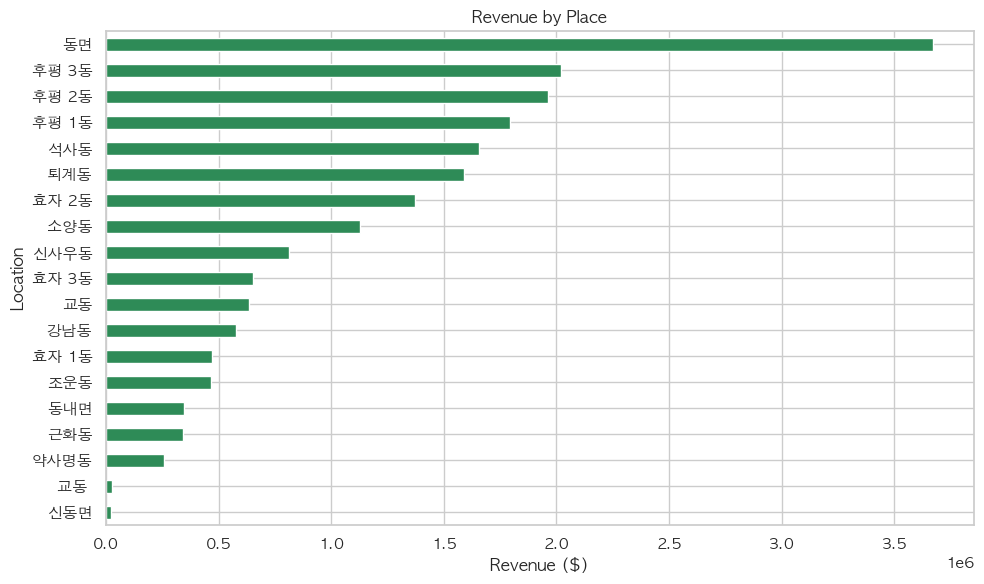

In [41]:
place_revenue = long_df.groupby('place')['total_revenue'].sum().sort_values()

plt.figure(figsize=(10, 6))
place_revenue.plot(kind='barh', color='seagreen')
plt.title("Revenue by Place")
plt.xlabel("Revenue ($)")
plt.ylabel("Location")
plt.tight_layout()

# Add labels 
for i, v in enumerate(place_revenue):
    ax.text(v + 1000, i, f"${v:,.0f}", va='center')

plt.savefig("cleaned_place_revenue.png", dpi=300, bbox_inches='tight')
plt.show()


In [39]:
print(long_df['place'].unique())


[nan '효자 3동' '후평 1동' '후평 2동' '석사동' '소양동' '퇴계동' '동면' '후평 3동' '신사우동' '강남동'
 '효자 1동' '조운동' '교동' '효자 2동' '약사명동' '근화동' '동내면' '교동 ' '신동면']


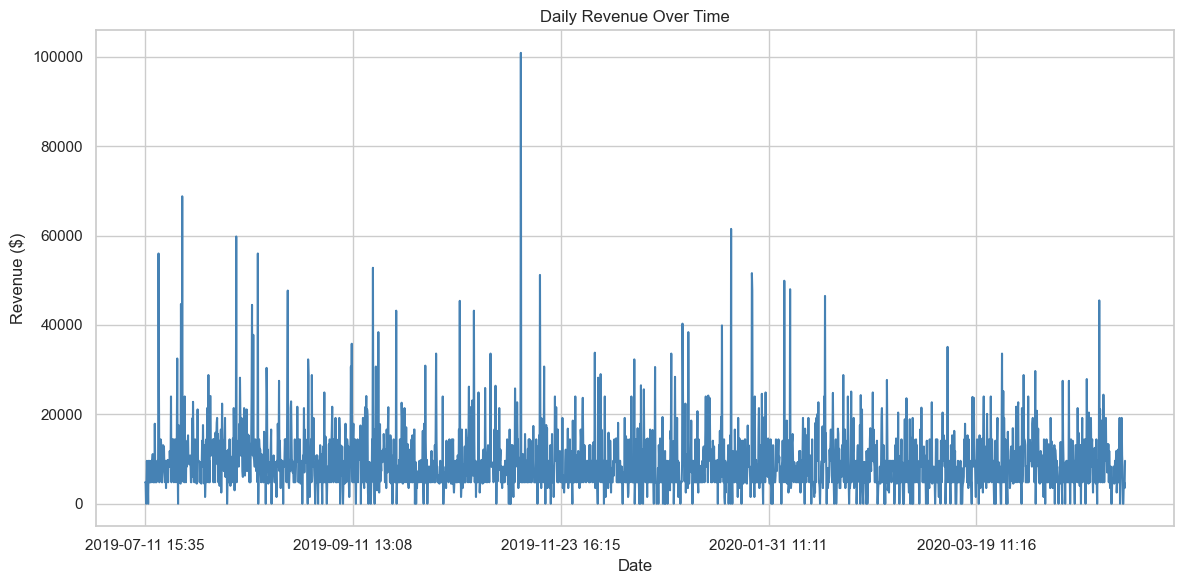

In [ ]:
daily_revenue = long_df.groupby('datetime')['total_revenue'].sum()

plt.figure(figsize=(12,6))
daily_revenue.plot(kind='line', color='steelblue')
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("revenue_by_time.png", dpi=300, bbox_inches='tight')
plt.show()

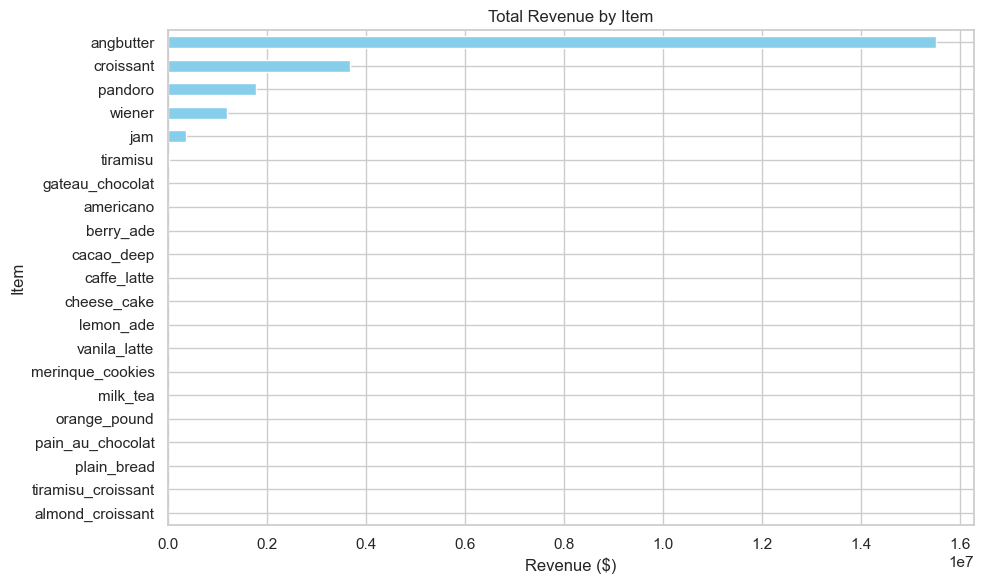

In [33]:
plt.figure(figsize=(10, 6))
item_revenue.plot(kind='barh', color='skyblue')
plt.title("Total Revenue by Item")
plt.xlabel("Revenue ($)")
plt.ylabel("Item")
plt.tight_layout()
plt.savefig("revenue_by_item_smaller.png", dpi=300, bbox_inches='tight')
plt.show()


In [26]:
# Group and sum revenue by item
item_revenue = long_df.groupby('item')['total_revenue'].sum()

# Remove items with 0 or missing revenue
item_revenue = item_revenue[item_revenue > 0].sort_values()

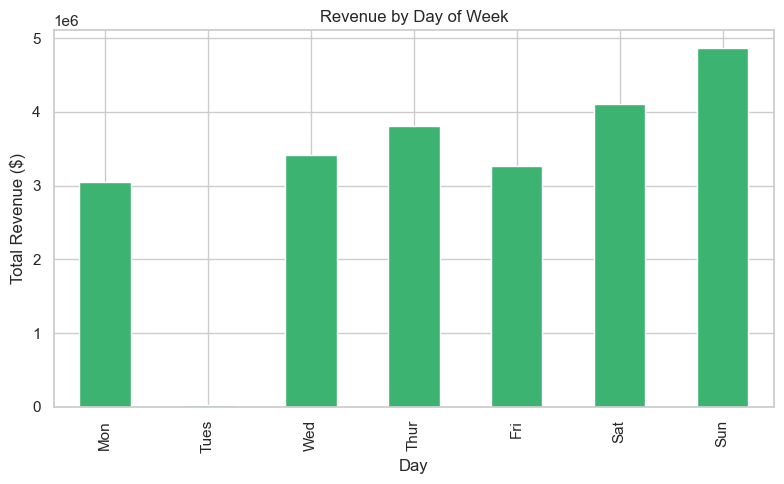

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
day_revenue.plot(kind='bar', color='mediumseagreen')
plt.title("Revenue by Day of Week")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Day")
plt.tight_layout()
plt.savefig("revenue_by_day_of_the_week.png", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# Group revenue by day abbreviation
day_revenue = long_df.groupby('day_of_week')['total_revenue'].sum()

# Reorder using abbreviations found in my dataset
ordered_days = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
day_revenue = day_revenue.reindex(ordered_days)

In [23]:
print(long_df['day_of_week'].unique())

['Thur' 'Sat' 'Sun' 'Mon' 'Wed' 'Fri' 'Tues']


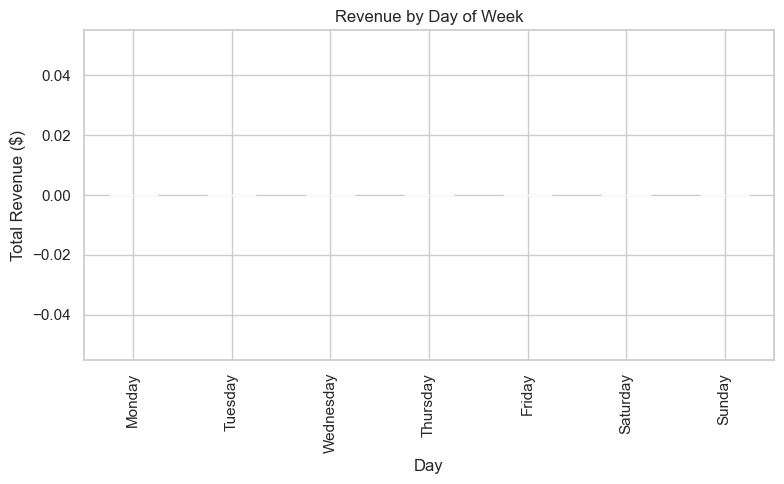

In [22]:
day_revenue = long_df.groupby('day_of_week')['total_revenue'].sum()

# Order days of week manually
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_revenue = day_revenue.reindex(ordered_days)

plt.figure(figsize=(8,5))
day_revenue.plot(kind='bar', color='mediumseagreen')
plt.title("Revenue by Day of Week")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Day")
plt.tight_layout()
plt.show()

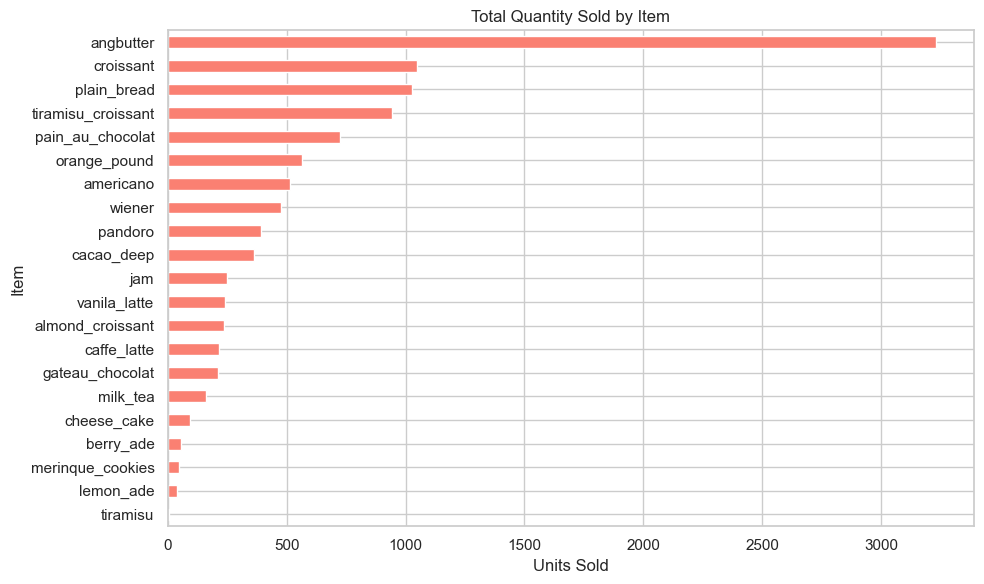

In [31]:
item_quantity = long_df.groupby('item')['quantity'].sum().sort_values()

plt.figure(figsize=(10,6))
item_quantity.plot(kind='barh', color='salmon')
plt.title("Total Quantity Sold by Item")
plt.xlabel("Units Sold")
plt.ylabel("Item")
plt.tight_layout()
plt.savefig("quantity_by_item.png", dpi=300, bbox_inches='tight')
plt.show()


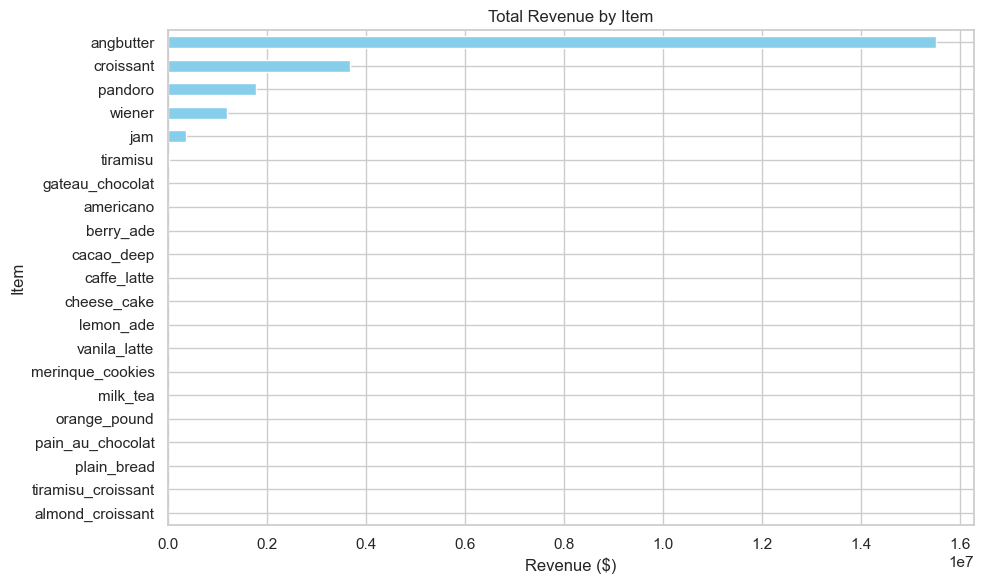

In [30]:
# Group by item and sum total revenue
item_revenue = long_df.groupby('item')['total_revenue'].sum().sort_values()

# Plot
plt.figure(figsize=(10,6))
item_revenue.plot(kind='barh', color='skyblue')
plt.title("Total Revenue by Item")
plt.xlabel("Revenue ($)")
plt.ylabel("Item")
plt.tight_layout()
plt.savefig("revenue_by_item.png", dpi=300, bbox_inches='tight')
plt.show()


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# This makes your plots look better
sns.set(style="whitegrid")

Matplotlib is building the font cache; this may take a moment.


In [87]:
# --- Step 1: Reshape the wide format into long format ---
long_df = merged_df.melt(
    id_vars=['datetime', 'day_of_week', 'total', 'place'],
    var_name='item',            # new column for item name
    value_name='quantity'       # new column for quantity sold
)

# --- Step 2: Drop rows where quantity is NaN (item not purchased) ---
long_df = long_df.dropna(subset=['quantity'])

# --- Step 3: Convert quantity column to numeric (just in case) ---
long_df['quantity'] = pd.to_numeric(long_df['quantity'], errors='coerce')

# --- Step 4: Convert price column to numeric (for safety) ---
price_df['price'] = pd.to_numeric(price_df['price'], errors='coerce')

# --- Step 5: Rename 'name' to 'item' in price_df for merging ---
price_df.rename(columns={'name': 'item'}, inplace=True)

# 🚨 Clean both item columns to ensure match works
long_df['item'] = long_df['item'].astype(str).str.strip().str.lower()
price_df['item'] = price_df['item'].astype(str).str.strip().str.lower()

# ✅ Now merge
long_df = long_df.merge(price_df, on='item', how='left')

# 🧪 Debug after merge
print("After merge shape:", long_df.shape)
print("Missing prices after merge:", long_df['price'].isna().sum())
print(long_df[['item', 'price']].drop_duplicates().head(10))

# --- Step 6: Merge in the unit price ---
long_df = long_df.merge(price_df, on='item', how='left')

# --- Step 7: Calculate total revenue ---
long_df['total_revenue'] = long_df['quantity'] * long_df['price']

# --- Step 8: Preview ---
long_df.head()


After merge shape: (8285, 7)
Missing prices after merge: 4640
                    item   price
0              angbutter 4800.00
1973         plain_bread     NaN
2830                 jam 1500.00
3050           americano     NaN
3462           croissant 3500.00
4209         caffe_latte     NaN
4402  tiramisu_croissant     NaN
5181          cacao_deep     NaN
5504    pain_au_chocolat     NaN
6091    almond_croissant     NaN


KeyError: 'price'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Fix column names
long_df.columns = long_df.columns.str.strip()
price_df.columns = price_df.columns.str.strip()

# Step 1: Rename `name` to `item` in price_df if needed
if 'name' in price_df.columns:
    price_df = price_df.rename(columns={'name': 'item'})

# Step 2: Drop NaNs in long_df['quantity']
long_df = long_df.dropna(subset=['quantity'])

# Step 3: Merge price info
long_df = long_df.merge(price_df[['item', 'price']], on='item', how='left')

# Step 4: Debug price issues
print("After merge shape:", long_df.shape)
print("Missing prices after merge:", long_df['price'].isna().sum())

# Optional: Drop rows with missing prices OR fill with 0 or average
long_df = long_df.dropna(subset=['price'])

# Step 5: Calculate total revenue
long_df['total_revenue'] = long_df['quantity'] * long_df['price']

# Step 6: Preview
print(long_df[['item', 'quantity', 'price', 'total_revenue']].head())


After merge shape: (8285, 9)
Missing prices after merge: 4640
        item  quantity   price  total_revenue
0  angbutter      1.00 4800.00        4800.00
1  angbutter      1.00 4800.00        4800.00
2  angbutter      1.00 4800.00        4800.00
3  angbutter      2.00 4800.00        9600.00
4  angbutter      1.00 4800.00        4800.00


In [15]:
print("Price DF Columns:", price_df.columns.tolist())

Price DF Columns: ['name', 'price']


In [13]:
print("Merged columns:\n", merged_df.columns.tolist())

Merged columns:
 ['datetime', 'day_of_week', 'total', 'place', 'angbutter', 'plain_bread', 'jam', 'americano', 'croissant', 'caffe_latte', 'tiramisu_croissant', 'cacao_deep', 'pain_au_chocolat', 'almond_croissant', 'croque_monsieur', 'mad_garlic', 'milk_tea', 'gateau_chocolat', 'pandoro', 'cheese_cake', 'lemon_ade', 'orange_pound', 'wiener', 'vanila_latte', 'berry_ade', 'tiramisu', 'merinque_cookies']


In [11]:
# Standardize column names
sales_df.columns = sales_df.columns.str.strip().str.lower().str.replace(" ", "_")
price_df.columns = price_df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert sale_date column to datetime (if exists)
if 'sale_date' in sales_df.columns:
    sales_df['sale_date'] = pd.to_datetime(sales_df['sale_date'])

# Merge the two datasets if there's a shared column (like 'item')
if 'item' in sales_df.columns and 'item' in price_df.columns:
    merged_df = sales_df.merge(price_df, on='item', how='left')
else:
    merged_df = sales_df.copy()

# Create a new column: total_revenue = quantity * unit_price
if 'quantity' in merged_df.columns and 'unit_price' in merged_df.columns:
    merged_df['total_revenue'] = merged_df['quantity'] * merged_df['unit_price']

# Preview cleaned data
merged_df.head()

,datetime,day_of_week,total,place,angbutter,plain_bread,jam,americano,croissant,caffe_latte,...,gateau_chocolat,pandoro,cheese_cake,lemon_ade,orange_pound,wiener,vanila_latte,berry_ade,tiramisu,merinque_cookies
0,2019-07-11 15:35,Thur,23800.00,NaN,1.00,NaN,NaN,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.00,NaN,1.00,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.00,NaN,2.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# See the first 5 rows of each dataset
print("Sales Data:")
display(sales_df.head())

print("\nPrice Data:")
display(price_df.head())

# See summary info
print("Sales DF Info:")
sales_df.info()

print("\nPrice DF Info:")
price_df.info()

# See missing values
print("\nMissing Values in Sales DF:")
print(sales_df.isnull().sum())

print("\nMissing Values in Price DF:")
print(price_df.isnull().sum())

Sales Data:


,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.00,NaN,1.00,NaN,NaN,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.00,NaN,1.00,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.00,NaN,2.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Price Data:


,Name,price
0,angbutter,4800
1,plain bread,3500
2,jam,1500
3,ice coffe,4000
4,croissant,3500


Sales DF Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      floa

In [9]:
sales_df = pd.read_csv("../data/Bakery Sales.csv")
price_df = pd.read_csv("../data/Bakery price.csv")

sales_df.head()

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.00,NaN,1.00,NaN,NaN,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.00,NaN,1.00,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.00,NaN,2.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [1]:
print("Hello world!")

Hello world!
